In [130]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import IPython
from sklearn import svm
from sklearn import tree
from sklearn.cross_validation import  cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
training_data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/titanic/data/train.csv'
test_data_filepath='/media/ghomsi/SERGUEI/Big_Data/bigdata_aims_senegal/titanic/data/test.csv'
print 'The path to the training data set is correct: ', os.path.exists(training_data_filepath)
print 'The path to the test data set is correct: ', os.path.exists(test_data_filepath)

The path to the training data set is correct:  True
The path to the test data set is correct:  True


In [3]:
df_training = pd.read_csv(training_data_filepath)
df_training.info()


df_test = pd.read_csv(test_data_filepath)

mean_fare_by_pclass = df_test[['Pclass','Fare']].groupby(['Pclass']).agg('mean')['Fare']
fare_given_pclass=df_test['Pclass'].apply(lambda x: mean_fare_by_pclass[x])
df_test['Fare'].fillna(fare_given_pclass,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)

In [4]:
df_training_clean = df_training.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)
df_test_clean = df_test.drop(['Age','Cabin','Embarked','Name','Sex','Ticket'],axis=1)

target = df_training_clean.pop('Survived') 
array_training_clean=df_training_clean.values
array_test_clean = df_test_clean.values
array_target=target.values

## DecisionTreeClassifier

In [103]:
clf_1 = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=5) 
clf_1.fit(array_training_clean, array_target)
survival_prediction =clf_1.predict(array_test_clean )
print("Training Score: ", clf_1.score(array_training_clean, array_target))

('Training Score: ', 0.74523007856341195)


('Training Score: ', 0.78451178451178449)


In [85]:
import StringIO, pydot 
dot_data = StringIO.StringIO() 
tree.export_graphviz(clf_1, out_file=dot_data, feature_names=df_training_clean.keys()) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("decision_tree_holiday_1.png") 

True

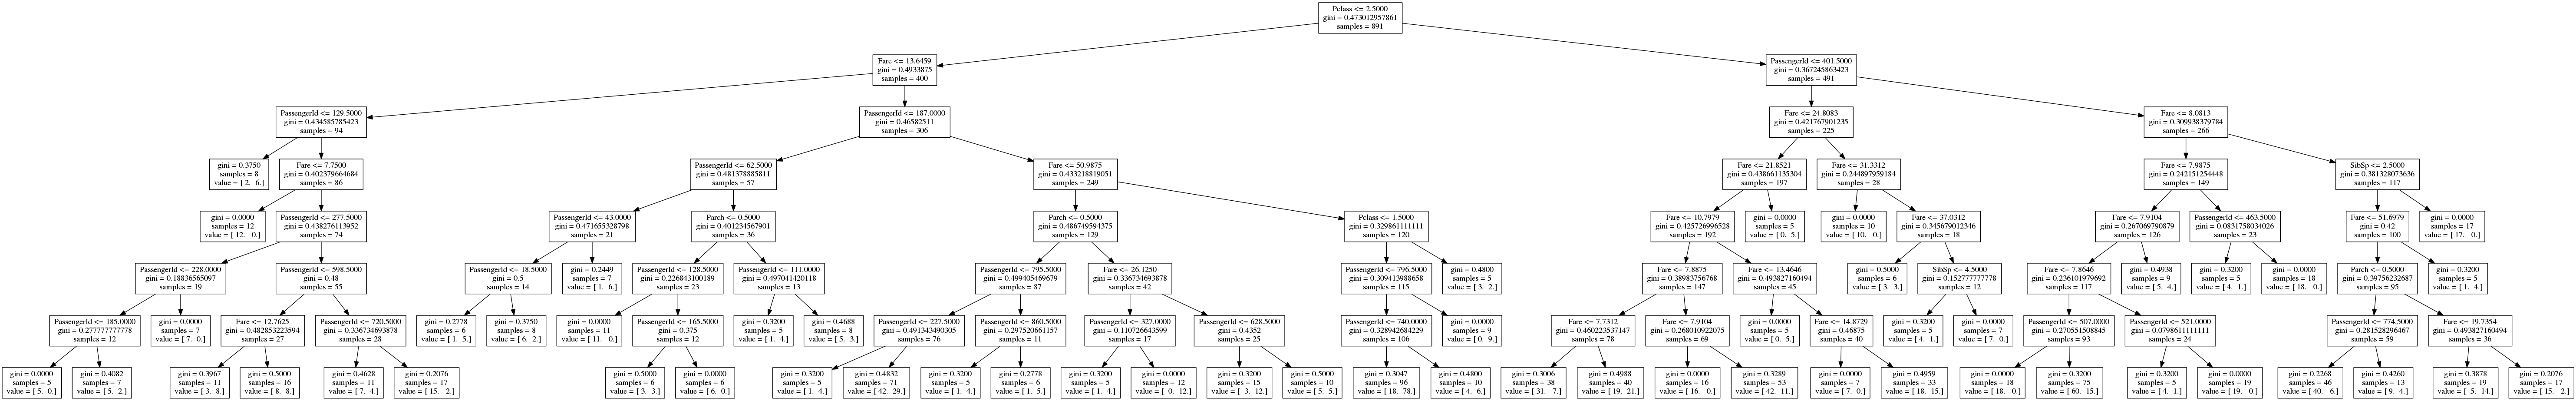

In [86]:
from IPython.core.display import Image 
Image(filename="decision_tree_holiday_1.png") 

## DecisionTreeClassifier Using Cross validation

In [142]:
clf_2 = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=5)
scores_2 = cross_val_score(clf_2, array_training_clean, array_target, cv=10)
print scores_2.mean(),scores_2.std(),scores_2


0.712621722846 0.0373662098765 [ 0.76666667  0.6741573   0.69662921  0.75280899  0.70786517  0.76404494
  0.68539326  0.69662921  0.65168539  0.73033708]


## RandomForestClassifier

In [113]:
clf_3 = RandomForestClassifier(min_samples_leaf=4,max_depth=5, n_estimators=100)
clf_3.fit(array_training_clean, array_target)
survival_prediction_3 =clf_3.predict(array_test_clean )
print("Training Score: ", clf_3.score(array_training_clean, array_target))

('Training Score: ', 0.77328843995510665)


## ExtraTreesClassifier

In [116]:
clf_4 =  ExtraTreesClassifier(min_samples_leaf=4,max_depth=5, n_estimators=100)
clf_4.fit(array_training_clean, array_target)
survival_prediction_4 =clf_4.predict(array_test_clean )
print("Training Score: ", clf_4.score(array_training_clean, array_target))

('Training Score: ', 0.72390572390572394)


In [121]:
clf_5 = AdaBoostClassifier(n_estimators=100)
clf_5.fit(array_training_clean, array_target)
survival_prediction_5 =clf_5.predict(array_test_clean )
print("Training Score: ", clf_5.score(array_training_clean, array_target))
scores = cross_val_score(clf_5, array_training_clean, array_target)
print("Training Score CV: " , scores.mean())

('Training Score: ', 0.75308641975308643)
('Training Score CV: ', 0.68013468013468026)


In [126]:
clf_6 = KNeighborsClassifier(3)
clf_6.fit(array_training_clean, array_target)
survival_prediction_6 =clf_6.predict(array_test_clean )
print("Training Score: ", clf_6.score(array_training_clean, array_target))
scores = cross_val_score(clf_6, array_training_clean, array_target)
print("Training Score CV: " , scores.mean())

('Training Score: ', 0.7991021324354658)
('Training Score CV: ', 0.63075196408529743)


In [134]:
clf_7 = GaussianNB()
clf_7.fit(array_training_clean, array_target)
survival_prediction_7 =clf_7.predict(array_test_clean )
print("Training Score: ", clf_7.score(array_training_clean, array_target))
scores = cross_val_score(clf_7, array_training_clean, array_target)
print("Training Score CV: " , scores.mean())

('Training Score: ', 0.67789001122334458)
('Training Score CV: ', 0.67789001122334458)
